## Argo Practice

The goal for this notebook is to start examining Argo data by looking at floats that have interesting profiles/sections. For a list of ACTION ITEMS that will hopefully be included, see: https://github.com/ocean-transport/argo-intern/issues/1#issuecomment-1150208594

In [147]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import cartopy
import argopy

In [148]:
#list of floats IDs I find interesting
float_sel = [6901199, 3901602, 5905033, 5905051, 1902024, 5904640, 1901863, 5903555]

In [150]:
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()

(<Figure size 900x540 with 1 Axes>,
 <GeoAxesSubplot:xlabel='longitude', ylabel='latitude'>)

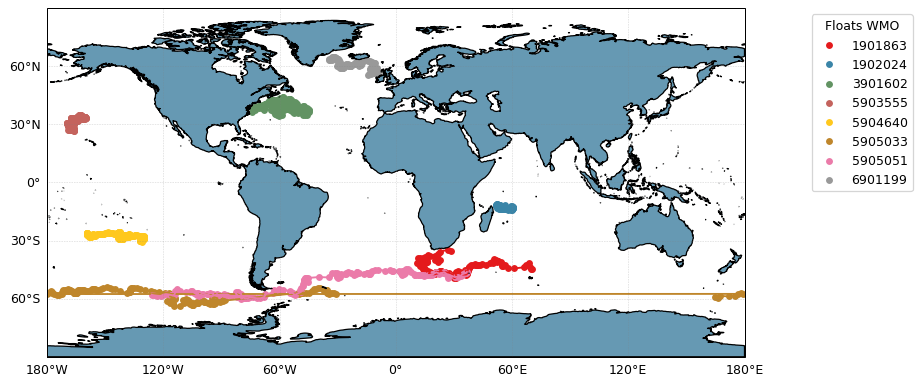

In [151]:
#plot the paths of each float on a global map

from argopy import DataFetcher as ArgoDataFetcher
idx = ArgoDataFetcher().float(float_sel).load()
idx.plot('trajectory', set_global=True)

In [ ]:
#create section plots for each float

from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()

fig,ax = plt.subplots(figsize=(50,40))

for n in range(0,6):
    this_float = argo_loader.float(float_sel[n]).to_xarray()
    this_float.set_coords("PRES")
    data = this_float.TEMP
    plt.subplot(3,2,n+1)
    data.plot(y='PRES')
    plt.title("Float number: {}".format(this_float.PLATFORM_NUMBER))
    
#this_float_profiles=this_float.argo.point2profile()
#this_float_profiles.TEMP.plot()
#this_float_profiles.TEMP.plot(y='N_LEVELS')

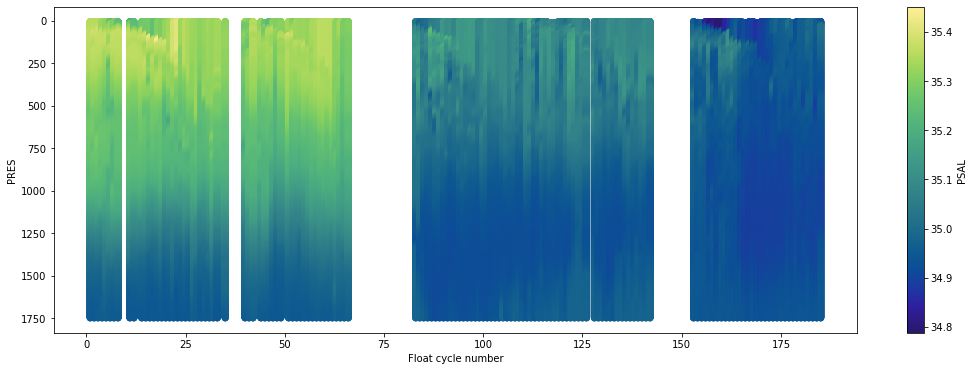

In [203]:
#Created using the interpolation method to define pressure levels

levels = list(range(0,1750,1))

afloat = argo_loader.float(float_sel[0]).to_xarray()
afloat_prof = afloat.argo.point2profile()
afloat_interp = afloat_prof.argo.interp_std_levels(levels)

fig,ax = plt.subplots(figsize=(18,6))
afloat_interp.plot.scatter(x='CYCLE_NUMBER', y='PRES', hue='PSAL', ax=ax, cmap=cmocean.cm.haline)
plt.gca().invert_yaxis()

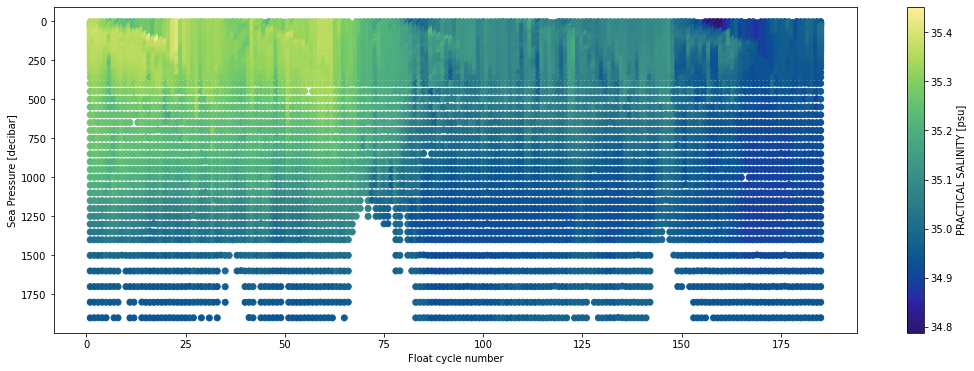

In [207]:
#Created using the bin method to define pressure levels
#https://argopy.readthedocs.io/en/latest/data_manipulation.html

from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()
import cmocean


afloat = argo_loader.float(float_sel[0]).to_xarray()
afloat_prof = afloat.argo.point2profile()

bins = np.arange(0.0, np.max(afloat_prof['PRES']))
afloat_binned = afloat_prof.argo.groupby_pressure_bins(bins=bins, select='random')

fig, ax = plt.subplots(figsize=(18,6))
afloat.plot.scatter(x='CYCLE_NUMBER', y='PRES', hue='PSAL', ax=ax, cmap=cmocean.cm.haline)
plt.gca().invert_yaxis()

In [189]:
levels

[range(0, 1850, 10)]